**Disclaimer**: Some examples and some text in this lesson are modified from Jake VanderPlas's [Python Data Science Handbook](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb). It is superb starting point for anyone who wants to learn more about machine learning and data science in Python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns

D:\Programs\Anaconda\envs\py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Intro to machine learning

Machine learning (ML) is a huge area of research and application, and it is currently expanding very quickly. We will look at the fundamentals principles of machine learning and try out some of the algorithms.

ML can be broadly defined as building models of data, usually with a purpose of transfomation (e.g. dimensionality reduction) or prediction (e.g. classification or regression), but sometimes just to further our understanding of the data.

"Learning" appears when we give these models **tunable parameters** that can be **adapted** to observed data; in this way the algorithm can be considered to be "learning" from the data.

# Categories of ML

### Supervised learning
Involves modeling the relationship between measured **features of data** and some **label** associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into **classification** tasks and **regression** tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.

### Unsupervised learning
Involves modeling the features of a dataset **without** reference to any label. These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for new representations of the data in a space with fewer dimensions.

In addition, there are so-called *semi-supervised* learning methods, which falls somewhere between supervised learning and unsupervised learning. Semi-supervised learning methods are often useful when only incomplete labels are available.

# Regression

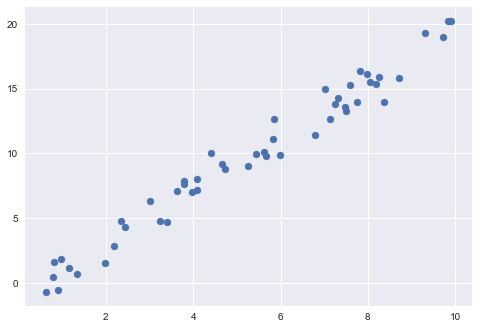

In [2]:
x = 10 * np.random.rand(50)
y = 2 * x - 1 + np.random.randn(50)
plt.scatter(x, y);

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
x.shape

(50,)

In [6]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [7]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
model.coef_

array([ 2.0761314])

In [9]:
model.intercept_

-1.1659484099153303

In [10]:
xfit = np.linspace(-1, 11)

In [11]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

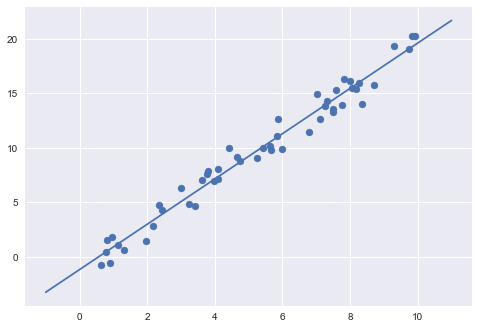

In [12]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Classification

In [13]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


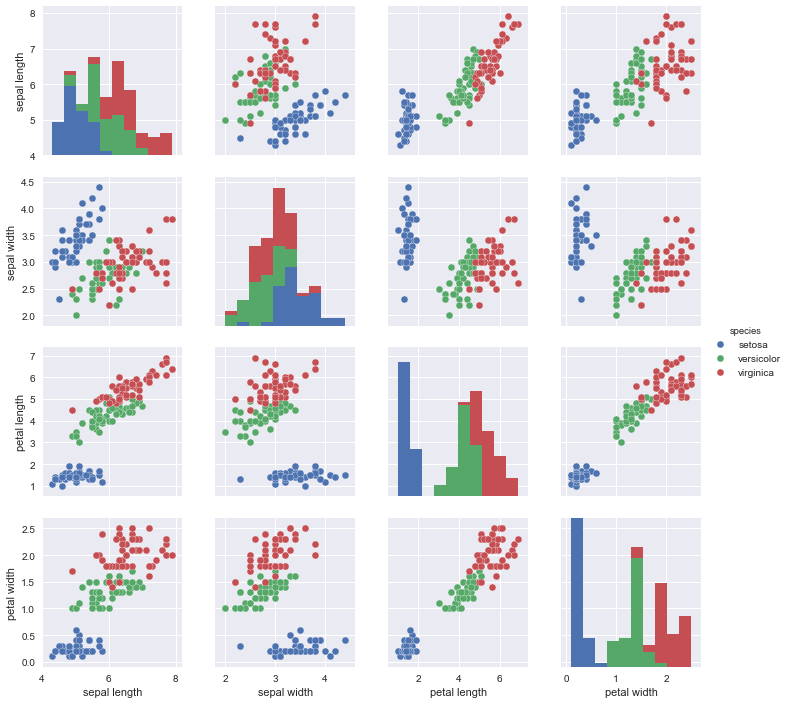

In [14]:
sns.pairplot(iris, hue='species', size=2.5);

In [15]:
X_iris = iris.drop('species', axis='columns')
X_iris.shape

(150, 4)

In [16]:
y_iris = iris['species']
y_iris.shape

(150,)

In [17]:
# 1. import a model class
from sklearn.naive_bayes import GaussianNB 

# 2. instantiate model
model = GaussianNB()                       

# 3. fit model to data
model.fit(X_iris, y_iris)                  

GaussianNB(priors=None)

In [18]:
y_model = model.predict(X_iris)

In [81]:
pd.DataFrame({'true_labels':y_iris, 'predicted_labels':y_model})

ValueError: array length 450 does not match index length 150

In [82]:
np.mean(y_iris == y_model)

ValueError: Lengths must match to compare

In [21]:
from sklearn.model_selection  import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris)

In [22]:
# 2. instantiate model
model = GaussianNB()            

# 3. fit model to data
model.fit(Xtrain, ytrain)                  

# 4. predict on new data
y_model = model.predict(Xtest)             

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.94736842105263153

# Dimensionality reduction / transformation

In [24]:
# 1. import the model class
from sklearn.decomposition import PCA  

# 2. instantiate the model with hyperparameters
model = PCA(n_components=2)            

# 3. fit to data. Notice y is not specified!
model.fit(X_iris)                      

# 4. transform the data to two dimensions
X_2D = model.transform(X_iris)         

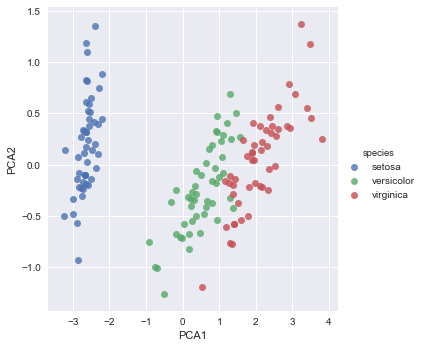

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# Clustering

In [32]:
# 1. import the model class
from sklearn.mixture import GaussianMixture     

# 2. instantiate the model with hyperparameters
model = GaussianMixture (n_components=3,
            covariance_type='full')  

# 3. fit to data. Notice y is not specified!
model.fit(X_iris)                    

# 4. determine cluster labels
iris['cluster'] = model.predict(X_iris)

iris.head()

,sepal length,sepal width,petal length,petal width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684207,0.326607,1
1,4.9,3.0,1.4,0.2,setosa,-2.715391,-0.169557,1
2,4.7,3.2,1.3,0.2,setosa,-2.889820,-0.137346,1
3,4.6,3.1,1.5,0.2,setosa,-2.746437,-0.311124,1
4,5.0,3.6,1.4,0.2,setosa,-2.728593,0.333925,1


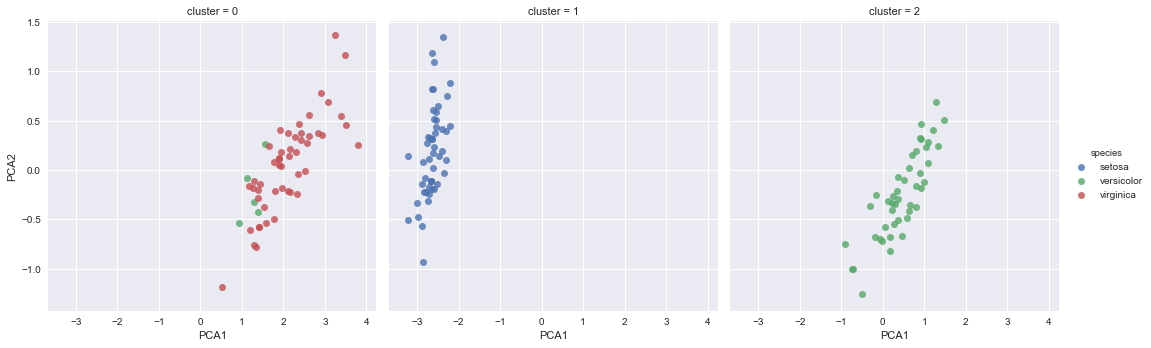

In [33]:
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()

In [42]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [43]:
digits.images.shape

(1797, 8, 8)

In [45]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

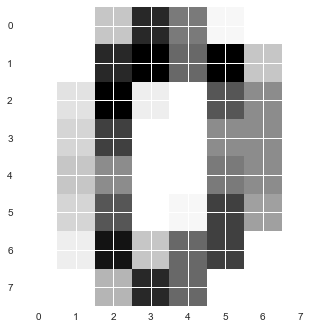

In [52]:
plt.imshow(digits.images[0])

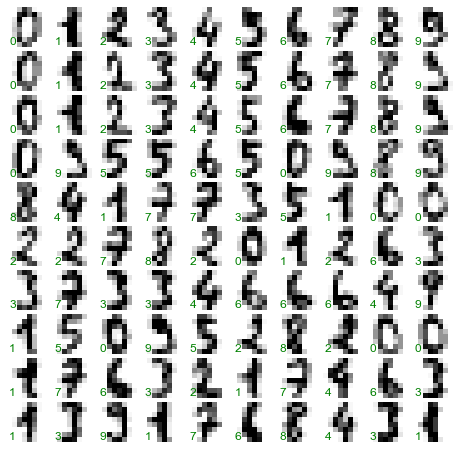

In [53]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i])
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [54]:
X = digits.data
X.shape

(1797, 64)

In [57]:
y = digits.target
y.shape

(1797,)

In [71]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

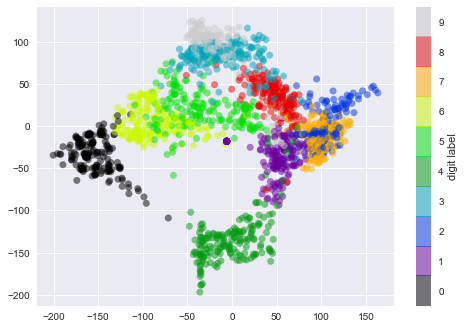

In [74]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

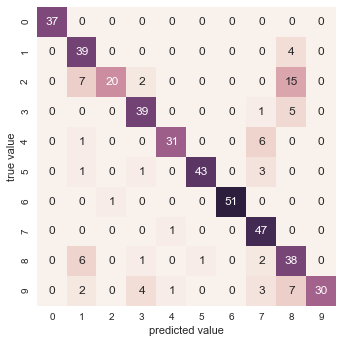

In [78]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

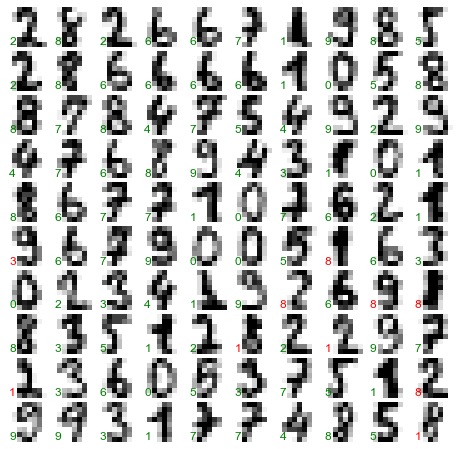

In [79]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')